# MLABvo - Get snapshots by ID's

This notebook shows how to get snapshots by station and date

``sudo pip install MLABvo``

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
from MLABvo.Bolidozor import Bolidozor
import json
import datetime
import MLABvo.Bolidozor
import MLABvo.BolidozorTools
import numpy as np
import matplotlib.dates as md
from matplotlib import dates

import sys
sys.path.append("..") 
import recviewer
import dateutil.parser

## Get meteors

In [2]:
bz = Bolidozor(debug = True)
bolids = bz.getMeteor(id = [29828697, 29828655, 29828694, 29828650])
print("\nPocet ziskanych meteoru je", len(bolids.result))

met_start_altitude = np.array([78000.0])
met_stop_altitude = np.array([21000.0])

met_stop_lon = np.array([14.459007])
met_stop_lat = np.array([49.020290])

met_start_lon = np.array([14.698326])
met_start_lat = np.array([49.207985])

met_velocity = [15000]

http://api.vo.astro.cz/bolidozor/getMeteor/ {'id': [29828697, 29828655, 29828694, 29828650]}
getResult 84e619bd-512f-476e-8a71-1dd8f339b25f True 0.25

Pocet ziskanych meteoru je 4


In [3]:
import matplotlib.pyplot as plt
#from astropy.visualization import astropy_mpl_style
from astropy.utils.data import download_file
from astropy.io import fits
#plt.style.use(astropy_mpl_style)

1 ==================================
2017-12-03T17:15:26


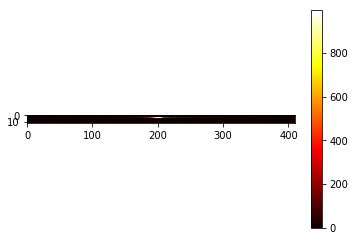

2 ==================================
2017-12-03T17:15:26


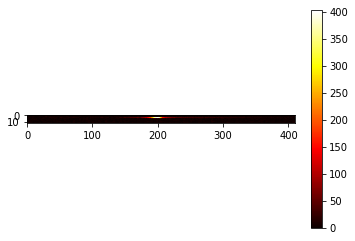

3 ==================================
2017-12-03T17:15:24


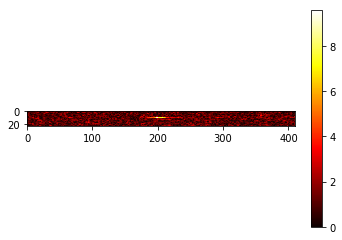

4 ==================================
2017-12-03T17:15:23


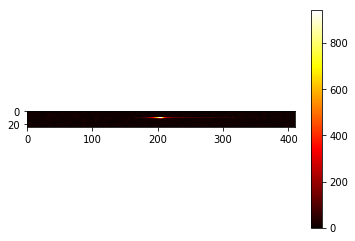

In [4]:
for i, snap in enumerate(bolids.result):
    image_file = download_file(snap['url_file'], cache=True)
    image_data = fits.getdata(image_file, ext=1)
    plt.figure()
    plt.imshow(image_data, cmap='hot')
    plt.colorbar()
    print(i+1, '==================================')
    print(snap['obstime'])
    plt.show()

In [5]:
def getMeteorAround(station, time, distance = datetime.timedelta(minutes=600)):
    try:
        b = Bolidozor(debug = False)
        print(station, b.setStation(station))
        meteors = b.getMeteor(date_from=time-distance, date_to=time+distance, min_duration=1).result
        #if len(meteors) > 0:
            #for met in meteors:
            #    print(met['url_file_raw'], met['duration'], met['obstime'])
    
        return meteors
    except Exception as e:
        print('getMeteorAround', e)
        return False

{'id': 29828655, 'obstime': '2017-12-03T17:15:26', 'peak_f': 26491.7, 'file_status': 'online', 'filename': '20171203171547509_DDMTREBIC-R3_met.fits', 'url_file_js9': 'http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/ddmtrebic/DDMTREBIC-R3/meteors/2017/12/03/17/20171203171547509_DDMTREBIC-R3_met.fits', 'url_station': 'http://api.vo.astro.cz/bolidozor/getStation/?id=27', 'mag': 380.077, 'filepath': '/storage/bolidozor/ddmtrebic/DDMTREBIC-R3/meteors/2017/12/03/17', 'filename_original': '20171203171547509_DDMTREBIC-R3_met.fits', 'url_file': 'http://space.astro.cz/bolidozor/ddmtrebic/DDMTREBIC-R3/meteors/2017/12/03/17/20171203171547509_DDMTREBIC-R3_met.fits', 'url_file_raw': 'http://space.astro.cz/bolidozor/ddmtrebic/DDMTREBIC-R3/meteors/2017/12/03/17/20171203171547509_DDMTREBIC-R3_raws.fits', 'noise': 9.82757, 'filename_raw': '20171203171547509_DDMTREBIC-R3_raws.fits', 'id_server': 1, 'duration': 0.512, 'id_observer': 27}

 0 ==================================
 snapshot: http

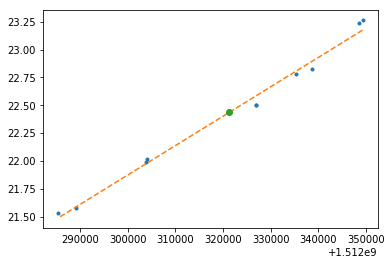

m, b: 2.64011639212e-05 -39904.6075728
Neznama SAMPCORRECTION proto pouzivam z vypoctu 22.4356406627
Zpracovavam soubor: http://space.astro.cz/bolidozor/ddmtrebic/DDMTREBIC-R3/meteors/2017/12/03/17/20171203171547509_DDMTREBIC-R3_raws.fits
delka zaznamu          : 2.6 s
cas prvni. vzorku s GPS: 0 s
cas 1. GPS a konec     : 2.6 s
SysCas ukladani souboru: 2017-12-03 17:15:28 s
SysCas zacatku souboru : 2017-12-03 17:15:25.400000
SysCas 1. GPS znacky   : 2017-12-03 17:15:25.400000
Korekce systemoveho cas: 0:00:00
Korekce casu zvukovky  : 22.4356406627 s
CorCas ukladani souboru: 2017-12-03 17:15:27.673359 s
CorCas zacatku souboru : 2017-12-03 17:15:25.073359
CorCas 1. GPS znacky   : 2017-12-03 17:15:25.073359
Kvalita souboru        : 50
Pocet vzorku s gps znac: 0


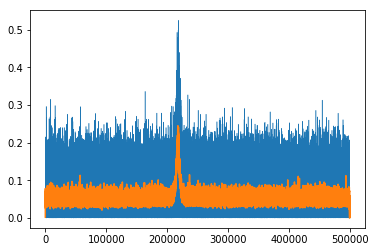

{'id': 29828697, 'obstime': '2017-12-03T17:15:26', 'peak_f': 26491.7, 'file_status': 'online', 'filename': '20171203171537095_HFN-R1_met.fits', 'url_file_js9': 'http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/HFN/HFN-R1/meteors/2017/12/03/17/20171203171537095_HFN-R1_met.fits', 'url_station': 'http://api.vo.astro.cz/bolidozor/getStation/?id=32', 'mag': 198.806, 'filepath': '/storage/bolidozor/HFN/HFN-R1/meteors/2017/12/03/17', 'filename_original': '20171203171537095_HFN-R1_met.fits', 'url_file': 'http://space.astro.cz/bolidozor/HFN/HFN-R1/meteors/2017/12/03/17/20171203171537095_HFN-R1_met.fits', 'url_file_raw': 'http://space.astro.cz/bolidozor/HFN/HFN-R1/meteors/2017/12/03/17/20171203171537095_HFN-R1_raws.fits', 'noise': 4.28694, 'filename_raw': '20171203171537095_HFN-R1_raws.fits', 'id_server': 1, 'duration': 0.512, 'id_observer': 32}

 1 ==================================
 snapshot: http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/HFN/HFN-R1/meteors/2017/1

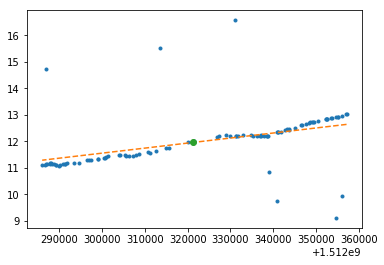

m, b: 1.89886201307e-05 -28704.930505
Neznama SAMPCORRECTION proto pouzivam z vypoctu 11.9646585231
Zpracovavam soubor: http://space.astro.cz/bolidozor/HFN/HFN-R1/meteors/2017/12/03/17/20171203171537095_HFN-R1_raws.fits
delka zaznamu          : 2.6 s
cas prvni. vzorku s GPS: 0 s
cas 1. GPS a konec     : 2.6 s
SysCas ukladani souboru: 2017-12-03 17:15:28 s
SysCas zacatku souboru : 2017-12-03 17:15:25.400000
SysCas 1. GPS znacky   : 2017-12-03 17:15:25.400000
Korekce systemoveho cas: 0:00:00
Korekce casu zvukovky  : 11.9646585231 s
CorCas ukladani souboru: 2017-12-03 17:15:27.730341 s
CorCas zacatku souboru : 2017-12-03 17:15:25.130341
CorCas 1. GPS znacky   : 2017-12-03 17:15:25.130341
Kvalita souboru        : 50
Pocet vzorku s gps znac: 0


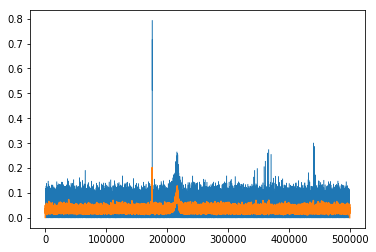

{'id': 29828650, 'obstime': '2017-12-03T17:15:24', 'peak_f': 26490.2, 'file_status': 'online', 'filename': '20171203171619590_SVAKOV-R12_met.fits', 'url_file_js9': 'http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/svakov/SVAKOV-R12/meteors/2017/12/03/17/20171203171619590_SVAKOV-R12_met.fits', 'url_station': 'http://api.vo.astro.cz/bolidozor/getStation/?id=29', 'mag': 6.33788, 'filepath': '/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/12/03/17', 'filename_original': '20171203171619590_SVAKOV-R12_met.fits', 'url_file': 'http://space.astro.cz/bolidozor/svakov/SVAKOV-R12/meteors/2017/12/03/17/20171203171619590_SVAKOV-R12_met.fits', 'url_file_raw': 'http://space.astro.cz/bolidozor/svakov/SVAKOV-R12/meteors/2017/12/03/17/20171203171619590_SVAKOV-R12_raws.fits', 'noise': 1.37803, 'filename_raw': '20171203171619590_SVAKOV-R12_raws.fits', 'id_server': 1, 'duration': 0.170667, 'id_observer': 29}

 2 ==================================
 snapshot: http://space.astro.cz/bolidozor/s

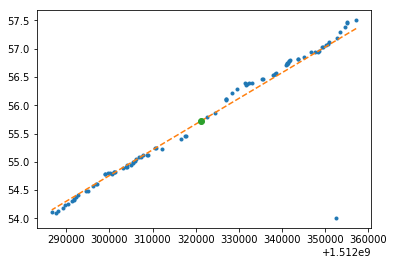

m, b: 4.53946737365e-05 -68595.6065997
Neznama SAMPCORRECTION proto pouzivam z vypoctu 55.7264607343
Zpracovavam soubor: http://space.astro.cz/bolidozor/svakov/SVAKOV-R12/meteors/2017/12/03/17/20171203171619590_SVAKOV-R12_raws.fits
delka zaznamu          : 4.5999895833333335 s
cas prvni. vzorku s GPS: 0 s
cas 1. GPS a konec     : 4.5999895833333335 s
SysCas ukladani souboru: 2017-12-03 17:15:28 s
SysCas zacatku souboru : 2017-12-03 17:15:23.400010
SysCas 1. GPS znacky   : 2017-12-03 17:15:23.400010
Korekce systemoveho cas: 0:00:00
Korekce casu zvukovky  : 55.7264607343 s
CorCas ukladani souboru: 2017-12-03 17:15:28.463529 s
CorCas zacatku souboru : 2017-12-03 17:15:23.863539
CorCas 1. GPS znacky   : 2017-12-03 17:15:23.863539
Kvalita souboru        : 50
Pocet vzorku s gps znac: 0


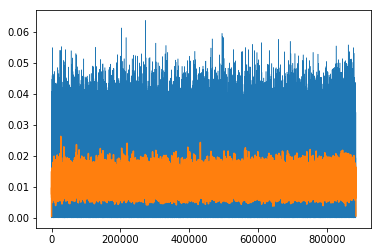

{'id': 29828694, 'obstime': '2017-12-03T17:15:23', 'peak_f': 26494.6, 'file_status': 'online', 'filename': '20171203160522651_VALMEZ-R1_met.fits', 'url_file_js9': 'http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/valmez/VALMEZ-R1/meteors/2017/12/03/16/20171203160522651_VALMEZ-R1_met.fits', 'url_station': 'http://api.vo.astro.cz/bolidozor/getStation/?id=30', 'mag': 162.833, 'filepath': '/storage/bolidozor/valmez/VALMEZ-R1/meteors/2017/12/03/16', 'filename_original': '20171203160522651_VALMEZ-R1_met.fits', 'url_file': 'http://space.astro.cz/bolidozor/valmez/VALMEZ-R1/meteors/2017/12/03/16/20171203160522651_VALMEZ-R1_met.fits', 'url_file_raw': 'http://space.astro.cz/bolidozor/valmez/VALMEZ-R1/meteors/2017/12/03/16/20171203160522651_VALMEZ-R1_raws.fits', 'noise': 10.632, 'filename_raw': '20171203160522651_VALMEZ-R1_raws.fits', 'id_server': 1, 'duration': 0.512, 'id_observer': 30}

 3 ==================================
 snapshot: http://space.astro.cz/bolidozor/support/js9brow

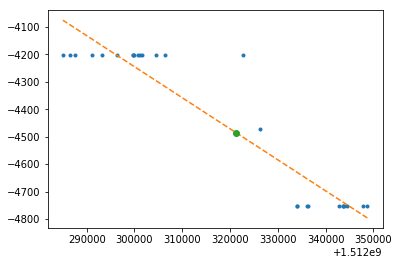

m, b: -0.0112993931211 17083826.8782
Neznama SAMPCORRECTION proto pouzivam z vypoctu -4486.27577966
Zpracovavam soubor: http://space.astro.cz/bolidozor/valmez/VALMEZ-R1/meteors/2017/12/03/16/20171203160522651_VALMEZ-R1_raws.fits
delka zaznamu          : 5.0 s
cas prvni. vzorku s GPS: 0 s
cas 1. GPS a konec     : 5.0 s
SysCas ukladani souboru: 2017-12-03 17:15:28 s
SysCas zacatku souboru : 2017-12-03 17:15:23
SysCas 1. GPS znacky   : 2017-12-03 17:15:23
Korekce systemoveho cas: 0:00:00
Korekce casu zvukovky  : -4486.27577966 s
CorCas ukladani souboru: 2017-12-03 17:20:13.926780 s
CorCas zacatku souboru : 2017-12-03 17:20:08.926780
CorCas 1. GPS znacky   : 2017-12-03 17:20:08.926780
Kvalita souboru        : 50
Pocet vzorku s gps znac: 0


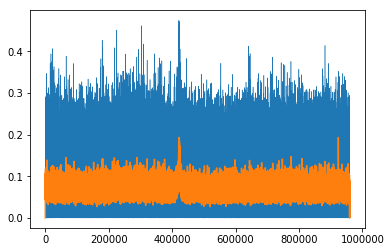

In [6]:
%matplotlib inline
for i, bolid in enumerate(bolids.result):
    print(bolid)
    try:
        print("\n", i,"==================================\n", "snapshot:", bolid['url_file_js9'])
        bolids.result[i]['time_calib'] = MLABvo.Bolidozor.timeCalibration(bolid['url_file_raw'], station = bolid['id_observer'],
                                                        sigma = 15, sigma_around=15, time_around = 10*60*60)
    except Exception as e:
        print("ERROR, bolids.result:", e)

Using matplotlib backend: TkAgg
0 2017-12-03 17:15:25.073359
1 2017-12-03 17:15:25.130341
2 2017-12-03 17:15:23.863539
3 2017-12-03 17:20:08.926780
1512321323.863539 1512321613.92678


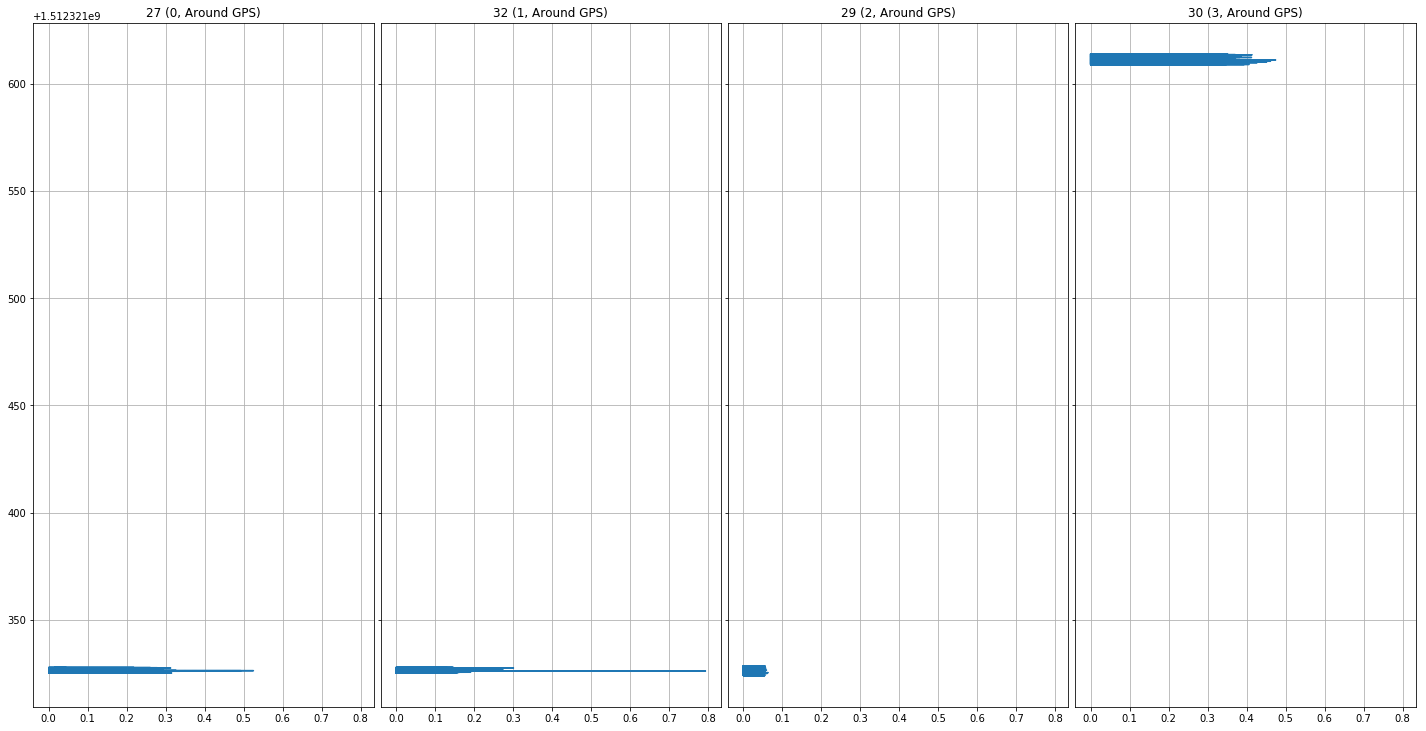

In [7]:
%matplotlib
fig, axis = plt.subplots(1, len(bolids.result), sharex=True, sharey=True, figsize=(20, 10))
time_offset = {}
gps_calib = True
minimal_time = None
maximal_time = None

for i, ax in enumerate(axis):
    try:
        bolid = bolids.result[i]
        print (i, bolid['time_calib']['cor_file_beg'])
        hdulist = fits.open(bolid['url_file_raw'])
        met_data = np.abs(np.ravel(hdulist[0].data))

        T_offset = 10*time_offset.get(i, 0)

        #if gps_calib:
        #    ax.set_title(str(bolid['id_observer']) + " (%s, %s)"%(i, bolid['time_calib']['method']))
        #    min_date = bolid['time_calib']['cor_file_beg'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
        #    max_date = bolid['time_calib']['cor_file_end'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
        #else:
        #    ax.set_title(bolid['namesimple'] + " (" + str(i)+") SYS-T")
        #    min_date = bolid['time_calib']['cor_file_beg'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
        #    max_date = bolid['time_calib']['cor_file_end'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
            
        
        if gps_calib: ax.set_title(str(bolid['id_observer']) + " (%s, %s)"%(i, bolid['time_calib']['method']))
        else: ax.set_title(bolid['namesimple'] + " (" + str(i)+") SYS-T")
        
        min_date = bolid['time_calib']['cor_file_beg'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
        max_date = bolid['time_calib']['cor_file_end'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
        array = np.arange(min_date, max_date, (max_date-min_date)/(len(met_data)))

        if not minimal_time: minimal_time = min_date
        if not maximal_time: maximal_time = max_date
        if min_date < minimal_time: minimal_time = min_date
        if max_date > maximal_time: maximal_time = max_date

        if met_data.shape[0] < array.shape[0]: array = array[:-1]
        #print(met_data.shape[0], array.shape[0], met_data.shape[0] > array.shape[0])
        ax.plot(met_data, array)
        ax.grid(True)
    except Exception as e:
        print(e)

fig.subplots_adjust(wspace=0.02, left = 0.02, right=0.98,bottom=0.02, top=0.97)
print(minimal_time, maximal_time)
plt.show()

In [8]:
def waterfall(signal, sample_rate=None, bins = 4096 ):
    waterfall = recviewer.waterfallize(signal, bins)
    waterfall[np.isneginf(waterfall)] = np.nan
    #wmin, wmax = np.nanmin(waterfall), np.nanmax(waterfall)
    return waterfall
slope = {}

In [9]:
stations = {}
stations['SVAKOV-R12']={'name': 'SVAKOV','latitude':49.2607,'longitude':14.6917,'elevation':400, 'status': 'operational', 'type': 'receiver'}
stations['ZVPP-R6']={'name': 'ZVPP','latitude':48.9869,'longitude':14.4675,'elevation':400, 'status': 'operational', 'type': 'receiver'}
stations['HFN-R1']={'name': 'JHRADEC','latitude':49.1314,'longitude': 14.9999,'elevation':400, 'status': 'operational', 'type': 'receiver'}
stations['VALMEZ-R1']={'name': 'VALMEZ','latitude':49.463038,'longitude': 17.973544,'elevation':400, 'status': 'testing', 'type': 'receiver'}
stations['DDMTREBIC-R3']={'name': 'TREBIC','latitude':49.2071,'longitude':15.8759,'elevation':480, 'status': 'operational', 'type': 'receiver'}


from Geocentric import Geocentric
geoC = Geocentric(6378137, 6356752.314)

In [10]:
##### %matplotlib inline 
%matplotlib notebook
%matplotlib tk
from matplotlib import interactive
interactive(True)

count = len(bolids.result)
fig, axis = plt.subplots(1, count, sharex=True, sharey=True, figsize=(20, 10))

#meteor_dopplers = [1,2]
timesteps = np.arange(-20,20,0.2)
met_points = np.empty([timesteps.size, 3])
#met_velocity = [45500]
#model_offset = 2.2

for meteor in range(len( bolids.result)):
    # get meteor vector from start and stop point
    
   # met_start_point = np.array(geoC.GeographicToGeocentric(met_start_lat[meteor], met_start_lon[meteor], met_start_altitude[meteor]))
   # met_stop_point = np.array(geoC.GeographicToGeocentric(met_stop_lat[meteor], met_stop_lon[meteor], met_stop_altitude[meteor]))
   # met_vect = met_stop_point - met_start_point
    #print(met_vect)
    
    #for i in range(timesteps.size):  # generate points on artifitial meteor trajectory (discretize in space)
    #    met_points[i] =  met_start_point + (met_vect/np.linalg.norm(met_vect) * (timesteps[i] * met_velocity[meteor]))
    #print("generation of points DONE")

    print(time_offset)
    fig.suptitle("Multibolid %s (%s), velocity: %s" %(datetime.datetime.utcfromtimestamp(minimal_time).date(), "CB bolid", 0))
    fig.subplots_adjust(hspace=0)
    plt.set_cmap('hot')
    for i, ax in enumerate(axis):
        bolid = bolids.result[i]
        print(i, bolid['id_observer'])
        
        hdu = fits.open(bolid['url_file_raw'])[0]
        flat_data = np.ravel(hdu.data)
        raw = flat_data[0::2] + 1j * flat_data[1::2]  # Bolidozor signal

        #T_offset = datetime.timedelta(seconds = 10*time_offset.get(i, 0))
        #print(i, selected[i], bolid['time_calib']['cor_file_beg'], bolid['time_calib']['cor_file_beg']+T_offset, T_offset)
        d1 = bolid['time_calib']['cor_file_beg']
        fds1 = dates.date2num(d1) # converted
        d2 = d1 + datetime.timedelta(seconds=hdu.header['NAXIS2']/96000)
        fds2 = dates.date2num(d2)
        raw_timestep = np.arange(d1.timestamp(), d2.timestamp(), 1/96000)
        #print(fds1, fds2, fds2-fds1)
        
        
        ## optical doppler
        #for station in stations:
        #rec_station_point = np.array(geoC.GeographicToGeocentric(stations[bolid['namesimple']]['latitude'], 
        #                                                         stations[bolid['namesimple']]['longitude'], stations[bolid['namesimple']]['elevation']))
        
        #doppler_t(met_points, timesteps, f0, trans_station_point, rec_station_point)
        #doppler = estimate_dopplers2(met_points, timesteps, f0, trans_station_point, rec_station_point)
        #if 'doppler_zero_index' not in locals():
        #    doppler_zero_index = np.argmin(np.abs(doppler[:,1][1:-1]))+1
        #    doppler_zero_time = doppler[doppler_zero_index][0]
        #dopp_time = np.vectorize(lambda x: dates.date2num(d1+datetime.timedelta(seconds=(x-doppler_zero_time+model_offset))))
        #dopp_freq = np.vectorize(lambda x: ((x)+26500.0))
        #ax.plot(dopp_freq(doppler[1:,1]), dopp_time(doppler[1:,0]), 'blue')
        
        # Bolidozor
        #print(raw)
        arr = waterfall(raw, None, bins = 4096*1)
        ax.imshow(arr,  interpolation='none', aspect='auto',  extent=[-48000, 48000, fds2, fds1])
        ax.grid(True)

        ax.set_xlim(13000*2,13500*2)
        ax.yaxis_date()
        date_format = md.DateFormatter('%H:%M:%S')
        ax.yaxis.set_major_formatter(date_format)
        fig.autofmt_xdate()
        ax.set_ylim( datetime.datetime.utcfromtimestamp(minimal_time), datetime.datetime.utcfromtimestamp(maximal_time))

        ax.set_title(bolid['id_observer'])

    fig.subplots_adjust(wspace=0.04, left = 0.03, right=0.98, bottom=0.03, top=0.93)
    plt.savefig('output.png', dpi=300)
    
    #plt.show()
    plt.ioff()
    plt.gcf().show()


{}
0 27
1 32
2 29
3 30
{}
0 27
1 32
2 29
3 30
{}
0 27
1 32
2 29
3 30
{}
0 27
1 32
2 29
3 30
